## ***Introduction***
A monitor or TV screen basically generates three types of colors, i.e., red, green, and yellow. But the combination and intensities of these three colors make various colors. Thus, each color has its unique HSV color code. For finding the specified color in the given image, we need to use the lower and upper bound of that color.

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

To read any image, we use the method cv2.imread() and specify the complete path of the image which gets imported into the notebook as a Numpy array. We can then plot it using the pyplot’s method imshow().

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


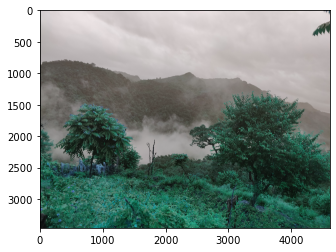

In [4]:
image = cv2.imread("sample_image.jpg")
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

The shape of the array is (3456, 4608, 3). The first two values match the pixels of the image. Third value is set to 3 as each pixel is represented as a combination of three colors, Red, Blue and Green.

The color of the image looks a bit off. This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).

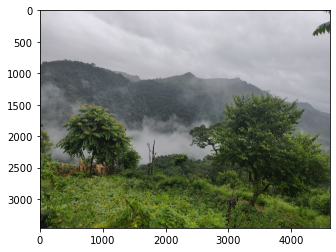

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

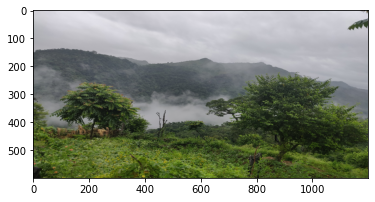

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## ***Color Identification***
Not that we know a bit about OpenCV, let's start identifying colors from an image.

First, we will define a function that can give us the hex values of our the colors that we will identify.

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.



In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([206.54114052, 206.24043949, 213.72127354]),
 array([55.38952364, 68.35017871, 34.50972637]),
 array([121.01193811, 125.57393441, 125.42507434]),
 array([84.13464372, 90.98727565, 92.24712028]),
 array([179.47846175, 180.06348689, 186.48006523]),
 array([30.68006569, 39.19173925, 21.40525489]),
 array([79.1988068 , 97.0276838 , 38.62213976]),
 array([110.1829093 , 125.6496218 ,  56.86991311])]

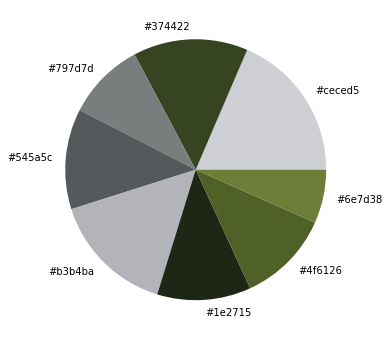

In [11]:
get_colors(get_image('sample_image.jpg'), 8, True)